In [5]:
import egttools as egt
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp

import run
from run import CRDWithExecutor, Cooperator, Defector, Executor

Z = 100         # Population size
N  = 4           # Group size
b  = 1.           # Endowment (individual's money/funds/...)
c  = 0.1         # Amount of money individuals contribute
Mc = 0.3         # Minimum collective contribution
M  = 3.           # OR Minimum number of cooperators
r  = 0.2         # If minimum is not met: All group participants lose their endowment with probability r, else: individuals retain their endowments
pi_t = 0.03
pi_e = 0.3
n_e = 0.25
alpha = 1.
mu    = 1/Z
beta = 5.

game = CRDWithExecutor(
    strategies=[Defector(c, b), Executor(c, b, pi_t, pi_e, alpha), Cooperator(c, b)],
    initial_endowment=b,
    population_size=Z,
    group_size=N,
    cost=c,
    risk=r,
    alpha=alpha,
    cooperation_threshold=M,
    enhancement_factor=1,
    pi_t=pi_t,
    pi_e=pi_e,
    n_e=n_e,
    mu=mu)

In [6]:
# Make population and group
current_population = np.array([33, 34, 33], dtype=int)
pop_id = egt.calculate_state(100, current_population)

dist = sp.stats.multivariate_hypergeom(current_population, game.N)
group = dist.rvs()[0]
group_id = egt.calculate_state(game.N, group,)

print(group)

[1 2 1]


In [7]:
# Test fitness difference
game.set_population_state(pop_id)
payoffs = game.calculate_payoffs()
evolver = egt.analytical.StochDynamics(
        3, 
        np.array(payoffs), 
        pop_size=game.Z, 
        group_size=game.N, 
        mu=game.mu)

evolver.full_fitness_difference_group(0, 2, population_state=current_population)

-0.20397834860279696

In [8]:
# Generating a random pair of 2 strategies from population
sample = sp.stats.multivariate_hypergeom.rvs(m=current_population, n=2)
print(sample)
idvs = [0 for _ in range(sample[0])]+[1 for _ in range(sample[1])]+[2 for _ in range(sample[2])]
np.random.shuffle(idvs)
print(idvs)

[0 2 0]
[1, 1]


In [9]:
# Calculating group achievement from stationary distribution estimate
import pickle
with open("fig1/alpha=0.pickle", 'rb') as f:
        sd = pickle.load(f)

group_achievement = sum([
        sd[i]*game.aG(i) for i in range(len(sd))
    ])
print("Alpha = 0:",group_achievement)

with open("fig1/alpha=1.pickle", 'rb') as f:
        sd = pickle.load(f)

group_achievement = sum([
        sd[i]*game.aG(i) for i in range(len(sd))
    ])
print("Alpha = 1:",group_achievement)

Alpha = 0: 0.6432707821631969
Alpha = 1: 0.9902054389878037


In [10]:
import pickle
with open("0.pickle", 'rb') as f:
        sd = pickle.load(f)

group_achievement = sum([
        sd[1][i]*game.aG(i) for i in range(len(sd[1]))
    ])
print("Alpha = 0:",group_achievement)

with open("1.pickle", 'rb') as f:
        sd = pickle.load(f)

group_achievement = sum([
        sd[1][i]*game.aG(i) for i in range(len(sd[1]))
    ])
print("Alpha = 1:",group_achievement)

Alpha = 0: 0.9253718835267142
Alpha = 1: 0.9993971055806767


In [10]:
from simulate import estimate_stationary_distribution

Z = 100         # Population size
N  = 4           # Group size
b  = 1.           # Endowment (individual's money/funds/...)
c  = 0.1         # Amount of money individuals contribute
Mc = 0.3         # Minimum collective contribution
M  = 3.           # OR Minimum number of cooperators
r  = 0.2         # If minimum is not met: All group participants lose their endowment with probability r, else: individuals retain their endowments
pi_t = 0.03
pi_e = 0.3
n_e = 0.25
alpha = 1.
mu    = 1/Z
beta = 5.

transitory = 10**2      # num of steps before we start counting
nb_generations = 10**4  # num of steps where we do count
nb_runs = 10            # num of different runs we average over

for alpha in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
        game = CRDWithExecutor(
            strategies=[Defector(c, b), Executor(c, b, pi_t, pi_e, alpha), Cooperator(c, b)],
            initial_endowment=b,
            population_size=Z,
            group_size=N,
            cost=c,
            risk=r,
            alpha=alpha,
            cooperation_threshold=M,
            enhancement_factor=1,
            pi_t=pi_t,
            pi_e=pi_e,
            n_e=n_e,
            mu=mu)
        beta = 5
        payoffs = game.calculate_payoffs()

        evolver = egt.analytical.StochDynamics(
            3, 
            np.array(payoffs), 
            pop_size=game.Z, 
            group_size=game.N, 
            mu=game.mu)
     
        #incredibly slow + bugged in egttools 1.11
        #stationary_distribution = evolver.calculate_stationary_distribution(beta=beta)
        stationary_distribution = estimate_stationary_distribution(
            game=game,
            nb_runs=nb_runs,
            transitory=transitory,
            nb_generations=nb_generations,
            beta=beta,
            mu=mu,
            Z=Z,
        )
        group_achievement = sum([
            stationary_distribution[i]*game.aG(i) for i in range(len(stationary_distribution))
        ])

        print(f'r={r}_alpha={alpha} => ', group_achievement)

        with open(f'fig2A_r={r}_alpha={alpha}.pickle', 'wb') as f:
            pickle.dump([payoffs, stationary_distribution, group_achievement], f)


		--- Run 0 ---
Initial state:	 [ 7 68 25]
After transitory period:	 [ 6 57 37]
Final state:	 [ 7  4 89]
		--- Run 1 ---
Initial state:	 [17 79  4]
After transitory period:	 [13 83  4]
Final state:	 [11 10 79]
		--- Run 2 ---
Initial state:	 [95  4  1]
After transitory period:	 [96  2  2]
Final state:	 [97  3  0]
		--- Run 3 ---
Initial state:	 [29 54 17]
After transitory period:	 [21 54 25]
Final state:	 [ 4  2 94]
		--- Run 4 ---
Initial state:	 [70 21  9]
After transitory period:	 [72 15 13]
Final state:	 [30  2 68]
		--- Run 5 ---
Initial state:	 [ 8 19 73]
After transitory period:	 [10 22 68]
Final state:	 [96  0  4]
		--- Run 6 ---
Initial state:	 [31 42 27]
After transitory period:	 [28 42 30]
Final state:	 [69  0 31]
		--- Run 7 ---
Initial state:	 [13 16 71]
After transitory period:	 [11  8 81]
Final state:	 [ 4 29 67]
		--- Run 8 ---
Initial state:	 [13 30 57]
After transitory period:	 [ 9 35 56]
Final state:	 [13  3 84]
		--- Run 9 ---
Initial state:	 [82  9  9]
After transi

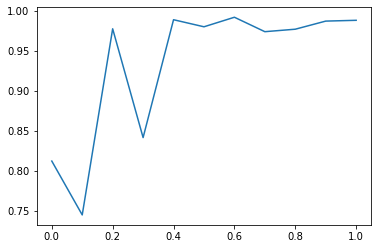

In [11]:
group_achievements = []
for alpha in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2A_r=0.2_alpha={alpha}.pickle", 'rb') as f:
        sd = pickle.load(f)
    group_achievement = sum([
        sd[1][i]*game.aG(i) for i in range(len(sd[1]))
    ])
    group_achievements.append(group_achievement)
    #print(f"Alpha = {alpha}:",group_achievement)
plt.plot(np.arange(0, 1.01, 0.1), group_achievements)

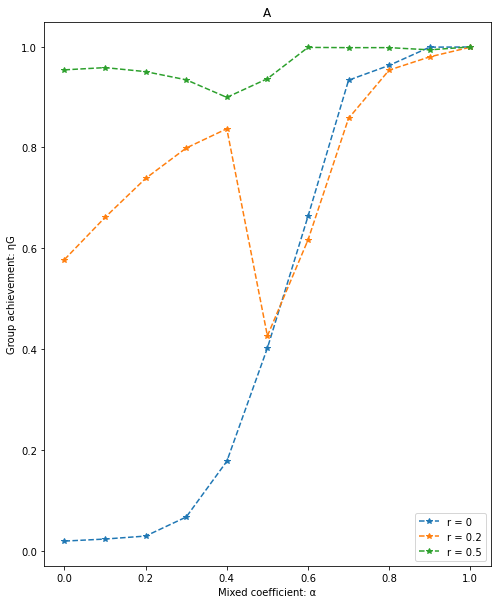

In [28]:
figA_r0 = []
for alpha in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2/fig2A_r=0_alpha={alpha}_mu=0.01_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figA_r0.append(sd[2])

figA_r02 = []
for alpha in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2/fig2A_r=0.2_alpha={alpha}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figA_r02.append(sd[2])

figA_r05 = []
for alpha in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2/fig2A_r=0.5_alpha={alpha}_mu=0.01_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figA_r05.append(sd[2])

    #group_achievements.append(group_achievement)
    #print(f"Alpha = {alpha}:",group_achievement)
plt.figure(figsize=(16,10))
plt.plot(np.arange(0, 1.01, 0.1), figA_r0,  '*--', label='r = 0')
plt.plot(np.arange(0, 1.01, 0.1), figA_r02, '*--', label='r = 0.2')
plt.plot(np.arange(0, 1.01, 0.1), figA_r05, '*--', label='r = 0.5')
plt.xlabel("Mixed coefficient: \u03B1")
plt.ylabel("Group achievement: \u03B7G")
plt.title("A")
plt.legend()
plt.show()
#plt.savefig("fig2/fig2A.png")

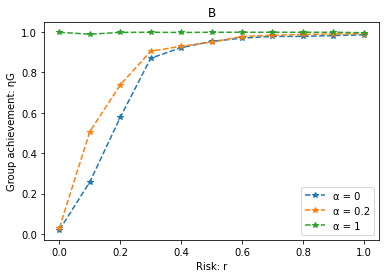

In [13]:
figB_a0 = []
for r in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2/fig2B_r={r}_alpha=0_mu=0.01_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figB_a0.append(sd[2])

figB_a02 = []
for r in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2/fig2B_r={r}_alpha=0.2_mu=0.01_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figB_a02.append(sd[2])

figB_a1 = []
for r in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    with open(f"fig2/fig2B_r={r}_alpha=1_mu=0.01_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figB_a1.append(sd[2])

    #group_achievements.append(group_achievement)
    #print(f"Alpha = {alpha}:",group_achievement)
plt.figure()
plt.plot(np.arange(0, 1.01, 0.1), figB_a0,  '*--', label='\u03B1 = 0')
plt.plot(np.arange(0, 1.01, 0.1), figB_a02, '*--', label='\u03B1 = 0.2')
plt.plot(np.arange(0, 1.01, 0.1), figB_a1,  '*--', label='\u03B1 = 1')
plt.xlabel("Risk: r")
plt.ylabel("Group achievement: \u03B7G")
plt.title("B")
plt.legend()
plt.show()
#plt.savefig("fig2/fig2B.png")

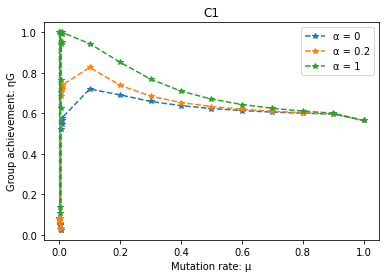

In [14]:
figC_a0 = []
mus = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for mu in mus:
    with open(f"fig2/fig2C_r=0.2_alpha=0_mu={mu}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figC_a0.append(sd[2])

figC_a02 = []
for mu in mus:
    with open(f"fig2/fig2C_r=0.2_alpha=0.2_mu={mu}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figC_a02.append(sd[2])

figC_a1 = []
for mu in mus:
    with open(f"fig2/fig2C_r=0.2_alpha=1_mu={mu}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figC_a1.append(sd[2])

    #group_achievements.append(group_achievement)
    #print(f"Alpha = {alpha}:",group_achievement)
plt.figure()
plt.plot(mus, figC_a0,  '*--', label='\u03B1 = 0')
plt.plot(mus, figC_a02, '*--', label='\u03B1 = 0.2')
plt.plot(mus, figC_a1,  '*--', label='\u03B1 = 1')
plt.xlabel("Mutation rate: \u03BC")
plt.ylabel("Group achievement: \u03B7G")
plt.title("C1")
plt.legend()
plt.show()
#plt.savefig("fig2/fig2C1.png")

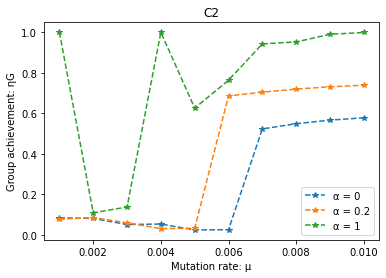

In [15]:
figC_a0 = []
mus = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
for mu in mus:
    with open(f"fig2/fig2C_r=0.2_alpha=0_mu={mu}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figC_a0.append(sd[2])

figC_a02 = []
for mu in mus:
    with open(f"fig2/fig2C_r=0.2_alpha=0.2_mu={mu}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figC_a02.append(sd[2])

figC_a1 = []
for mu in mus:
    with open(f"fig2/fig2C_r=0.2_alpha=1_mu={mu}_diffne.pickle", 'rb') as f:
        sd = pickle.load(f)
    figC_a1.append(sd[2])

    #group_achievements.append(group_achievement)
    #print(f"Alpha = {alpha}:",group_achievement)
plt.figure()
plt.plot(mus, figC_a0,  '*--', label='\u03B1 = 0')
plt.plot(mus, figC_a02, '*--', label='\u03B1 = 0.2')
plt.plot(mus, figC_a1,  '*--', label='\u03B1 = 1')
plt.xlabel("Mutation rate: \u03BC")
plt.ylabel("Group achievement: \u03B7G")
plt.title("C2")
plt.legend()
plt.show()
#plt.savefig("fig2/fig2C2.png")

In [1]:
import egttools as egt
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp

import run
from run import CRDWithExecutor, Cooperator, Defector, Executor

Z = 100         # Population size
N  = 4           # Group size
b  = 1.           # Endowment (individual's money/funds/...)
c  = 0.1         # Amount of money individuals contribute
Mc = 0.3         # Minimum collective contribution
M  = 3.           # OR Minimum number of cooperators
r  = 0.2         # If minimum is not met: All group participants lose their endowment with probability r, else: individuals retain their endowments
pi_t = 0.03
pi_e = 0.3
n_e = 2
alpha = 1.
mu    = 1/Z
beta = 5.

transitory = 10**2      # num of steps before we start counting
nb_generations = 10**4  # num of steps where we do count
nb_runs = 10            # num of different runs we average over

for alpha in [0, 0.1, 0.2, 0.3, 0.4, 0.5]:#, 0.6, 0.7, 0.8, 0.9, 1]:
    game = CRDWithExecutor(
        strategies=[Defector(c, b), Executor(c, b, pi_t, pi_e, alpha), Cooperator(c, b)],
        initial_endowment=b,
        population_size=Z,
        group_size=N,
        cost=c,
        risk=r,
        alpha=alpha,
        cooperation_threshold=M,
        enhancement_factor=1,
        pi_t=pi_t,
        pi_e=pi_e,
        n_e=n_e,
        mu=mu,
        incentive=('local', 'flexible'))
    beta = 5
    payoffs = game.calculate_payoffs()


    evolver = egt.analytical.StochDynamics(
        3, 
        np.array(payoffs), 
        pop_size=game.Z, 
        group_size=game.N, 
        mu=game.mu)

print(payoffs)
nb_states = egt.calculate_nb_states(4, 3)
for i in range(nb_states):
    group = egt.sample_simplex(i, 4, 3)
    print(group, " -> ", np.transpose(payoffs)[i])
     
        #incredibly slow + bugged in egttools 1.11
        #stationary_distribution = evolver.calculate_stationary_distribution(beta=beta)
        #stationary_distribution = estimate_stationary_distribution(
        #    game=game,
        #    nb_runs=nb_runs,
        #    transitory=transitory,
        #    nb_generations=nb_generations,
        #    beta=beta,
        #    mu=mu,
        #    Z=Z,
        #)
        #group_achievement = sum([
        #    stationary_distribution[i]*game.aG(i) for i in range(len(stationary_distribution))
        #])

        #print(f'r={r}_alpha={alpha} => ', group_achievement)

        #with open(f'fig2A_r={r}_alpha={alpha}.pickle', 'wb') as f:
        #    pickle.dump([payoffs, stationary_distribution, group_achievement], f)

[[ 0.8      0.8      0.8      0.785    0.8      0.8      0.955    0.97
   1.       1.       0.       0.       0.       0.       0.     ]
 [-0.03     0.67     0.67     0.685    0.67     0.67     0.885    0.88
   0.87     0.87     0.885    0.88125  0.8775   0.87     0.87   ]
 [ 0.       0.7      0.7      0.715    0.7      0.7      0.915    0.91
   0.9      0.9      0.915    0.91125  0.9075   0.9      0.9    ]]
[4 0 0]  ->  [ 0.8  -0.03  0.  ]
[3 1 0]  ->  [0.8  0.67 0.7 ]
[3 0 1]  ->  [0.8  0.67 0.7 ]
[2 2 0]  ->  [0.785 0.685 0.715]
[2 1 1]  ->  [0.8  0.67 0.7 ]
[2 0 2]  ->  [0.8  0.67 0.7 ]
[1 3 0]  ->  [0.955 0.885 0.915]
[1 2 1]  ->  [0.97 0.88 0.91]
[1 1 2]  ->  [1.   0.87 0.9 ]
[1 0 3]  ->  [1.   0.87 0.9 ]
[0 4 0]  ->  [0.    0.885 0.915]
[0 3 1]  ->  [0.      0.88125 0.91125]
[0 2 2]  ->  [0.     0.8775 0.9075]
[0 1 3]  ->  [0.   0.87 0.9 ]
[0 0 4]  ->  [0.   0.87 0.9 ]


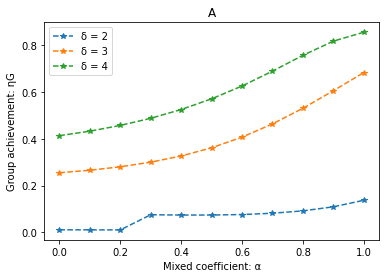

In [17]:
deltas = [2, 3, 4]
alphas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
results = {}

for delta in deltas:
    temp = []
    for alpha in alphas:
        with open(f"fig4/fig4A_delta={delta}_alpha={alpha}_mu=0.01_ne=2.pickle", 'rb') as f:
            sd = pickle.load(f)
        temp.append(sd[2])
    results[delta] = temp

plt.figure()
for i, delta in enumerate(deltas):
    plt.plot(alphas, results[delta], '*--', label=f'\u03B4 = {delta}')
plt.xlabel("Mixed coefficient: \u03B1")
plt.ylabel("Group achievement: \u03B7G")
plt.title("A")
plt.legend()
plt.show()
#plt.savefig("fig4/fig4A.png")

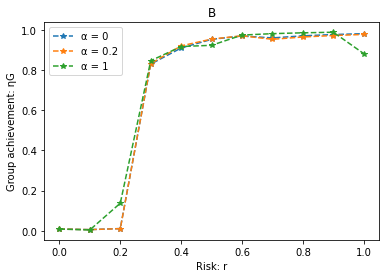

In [21]:
alphas = [0, 0.2, 1]
risks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
results = {}

for alpha in alphas:
    temp = []
    for risk in risks:
        with open(f"fig4/fig4B_r={risk}_alpha={alpha}_mu=0.01_ne=2.pickle", 'rb') as f:
            sd = pickle.load(f)
        temp.append(sd[2])
    results[alpha] = temp

plt.figure()
for i, alpha in enumerate(alphas):
    plt.plot(risks, results[alpha],  '*--', label=f'\u03B1 = {alpha}')
plt.xlabel("Risk: r")
plt.ylabel("Group achievement: \u03B7G")
plt.title("B")
plt.legend()
plt.show()
#plt.savefig("fig2/fig2C2.png")

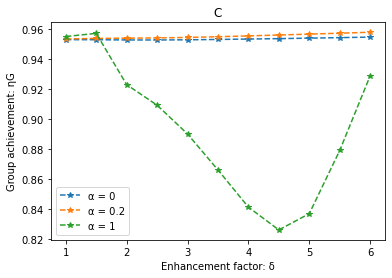

In [27]:
alphas = [0, 0.2, 1]
deltas = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
results = {}

for alpha in alphas:
    temp = []
    for delta in deltas:
        with open(f"fig4/fig4C_delta={delta}_alpha={alpha}_mu=0.01_ne=2.pickle", 'rb') as f:
            sd = pickle.load(f)
        temp.append(sd[2])
    results[alpha] = temp

plt.figure()
for i, alpha in enumerate(alphas):
    plt.plot(deltas, results[alpha],  '*--', label=f'\u03B1 = {alpha}')
plt.xlabel("Enhancement factor: \u03B4")
plt.ylabel("Group achievement: \u03B7G")
plt.title("C")
plt.legend()
plt.show()
#plt.savefig("fig2/fig2C2.png")

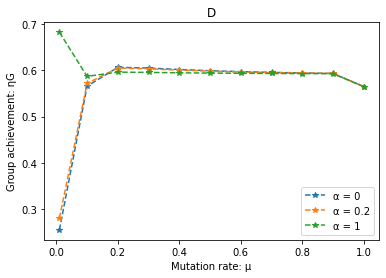

In [26]:
alphas = [0, 0.2, 1]
mus = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
results = {}

for alpha in alphas:
    temp = []
    for mu in mus:
        with open(f"fig4/fig4D_delta=3_alpha={alpha}_mu={mu}_ne=2.pickle", 'rb') as f:
            sd = pickle.load(f)
        temp.append(sd[2])
    results[alpha] = temp

plt.figure()
for i, alpha in enumerate(alphas):
    plt.plot(mus, results[alpha],  '*--', label=f'\u03B1 = {alpha}')
plt.xlabel("Mutation rate: \u03BC")
plt.ylabel("Group achievement: \u03B7G")
plt.title("D")
plt.legend()
plt.show()
#plt.savefig("fig4/fig4D.png")